# Logistic regression
```



In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

import matplotlib.pyplot as plt

from torch.utils.data import Dataset
from torch.utils.data import DataLoader


def readDataset(file_path, features_labels_to_drop):

  # reading the csvs
  dataset = pd.read_csv(file_path)

  features = dataset.drop(features_labels_to_drop, axis=1).to_numpy()
  features_torch = torch.from_numpy(features).to(torch.float32)

  labels = dataset["label"].to_numpy()
  labels_torch= torch.unsqueeze(torch.from_numpy(labels).to(torch.float32), 1)

  return features_torch, labels_torch



###########################
# Creating the dataloaders class
###########################

class newDataset(Dataset):
    def __init__(self, features, labels):
        self.data = features
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

###########################
# Creating a logistic regression model with Pytorch
###########################

class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        x = self.linear(x)
        x = torch.sigmoid(x)
        return x

###########################
# Define training procedure
###########################
def train(epoch, model):

    loss_per_epoch = 0
    correct_per_epoch = 0
    total_inputs_per_epoch = 0

    # set the model to training mode
    model.train()

    for batch_idx, (inputs, targets) in enumerate(training_dataLoader):
        # Clear gradient
        optimizer.zero_grad()

        # Forward pass batch through model
        outputs = model(inputs)

        # Calculate loss on batch (mean for this batch)
        loss = criterion(outputs, targets)
        # Calculate gradients for backward pass
        loss.backward()

        # Update model
        optimizer.step()

        loss_per_epoch += loss.item()
        total_inputs_per_epoch += targets.size(0)

        outputs_class = torch.zeros(targets.shape)
        outputs_class[outputs>=0.5] = 1
        correct_per_epoch += torch.sum(outputs_class==targets)


    epoch_loss = loss_per_epoch/len(training_dataLoader)
    accuracy_epoch = 100.*correct_per_epoch/total_inputs_per_epoch

    return epoch_loss, accuracy_epoch.item()


###########################
# Define testing procedure
###########################
def test(epoch, model):
    #print('Epoch: %d' % epoch)
    losses = [] # needed for visualize the traning loss
    model.eval()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(testing_dataLoader):
        # Forward pass batch through model
        outputs = model(inputs)

        # Calculate loss on batch
        loss = criterion(outputs, targets)
        train_loss += loss.item()

        total += targets.size(0)
        outputs_class = torch.zeros(targets.shape)
        outputs_class[outputs>=0.5] = 1
        correct += torch.sum(outputs_class==targets)

    #print(total)
    epoch_loss = train_loss/len(testing_dataLoader)
    accuracy_epoch = 100.*correct/total

    return epoch_loss, accuracy_epoch.item()


# Create the dataloaders

batch size defined here


In [28]:
filePath_training = "./datasets/training_dataset.csv"
filePath_testing = "./datasets/testing_dataset.csv"

drop_features_and_labels = ['dpkts', 'dbytes', 'sttl', 'dloss', 'dinpkt', 'sjit', 'djit', 'stcpb',
       'dtcpb', 'dwin', 'smean', 'trans_depth', 'response_body_len',
       'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm', 'attack_cat', "label"]

X_training, y_training = readDataset(filePath_training, drop_features_and_labels)
X_testing, y_testing = readDataset(filePath_testing, drop_features_and_labels)



# Defining batch size to create data loaders
batch_size = 16
training_dataset_object = newDataset(X_training, y_training)
training_dataLoader = DataLoader(training_dataset_object, batch_size=batch_size)

testing_dataset_object = newDataset(X_testing, y_testing)
testing_dataLoader = DataLoader(testing_dataset_object, batch_size=batch_size)

# Train first model

Parameters:


In [32]:
lr1 = 0.001
epochs = 20

model_lr1 = LogisticRegression(input_dim = X_training.shape[1])

criterion = nn.BCELoss()
optimizer = optim.SGD(model_lr1.parameters(), lr=lr1)


training_losses_lr1 = []
training_accs_lr1 = []
testing_losses_lr1 = []
testing_accs_lr1 = []

for epoch in range(epochs):

    loss_train, acc_train = train(epoch, model_lr1)
    training_losses_lr1.append(loss_train)
    training_accs_lr1.append(acc_train)

    loss_testing, acc_testing = test(epoch, model_lr1)
    testing_losses_lr1.append(loss_testing)
    testing_accs_lr1.append(acc_testing)

    print('Epoch: %d' % epoch + " Done   |   Training - loss: " + f"{loss_train:.3f}" +
          " acc: " + f"{acc_train:.3f}" + "   | Testing - loss: " + f"{loss_testing:.3f}" +
          " acc: " + f"{acc_testing:.3f}")


Epoch: 0 Done   |   Training - loss: 0.613 acc: 66.636   | Testing - loss: 0.560 acc: 78.727
Epoch: 1 Done   |   Training - loss: 0.529 acc: 79.652   | Testing - loss: 0.508 acc: 79.410
Epoch: 2 Done   |   Training - loss: 0.488 acc: 79.790   | Testing - loss: 0.475 acc: 79.410
Epoch: 3 Done   |   Training - loss: 0.460 acc: 79.798   | Testing - loss: 0.452 acc: 79.447
Epoch: 4 Done   |   Training - loss: 0.440 acc: 79.933   | Testing - loss: 0.434 acc: 79.647
Epoch: 5 Done   |   Training - loss: 0.423 acc: 80.303   | Testing - loss: 0.419 acc: 80.671
Epoch: 6 Done   |   Training - loss: 0.410 acc: 82.337   | Testing - loss: 0.407 acc: 83.064
Epoch: 7 Done   |   Training - loss: 0.399 acc: 83.564   | Testing - loss: 0.397 acc: 83.266
Epoch: 8 Done   |   Training - loss: 0.389 acc: 83.650   | Testing - loss: 0.388 acc: 83.280
Epoch: 9 Done   |   Training - loss: 0.381 acc: 83.677   | Testing - loss: 0.381 acc: 83.299
Epoch: 10 Done   |   Training - loss: 0.374 acc: 83.710   | Testing - 

# Train second model

Parameters:


In [34]:
lr2 = 0.01
epochs = 20

model_lr2 = LogisticRegression(input_dim = X_training.shape[1])

criterion = nn.BCELoss()
optimizer = optim.SGD(model_lr2.parameters(), lr=lr2)



training_losses_lr2 = []
training_accs_lr2 = []
testing_losses_lr2 = []
testing_accs_lr2 = []

for epoch in range(epochs):

    loss_train, acc_train = train(epoch, model_lr2)
    training_losses_lr2.append(loss_train)
    training_accs_lr2.append(acc_train)

    loss_testing, acc_testing = test(epoch, model_lr2)
    testing_losses_lr2.append(loss_testing)
    testing_accs_lr2.append(acc_testing)

    print('Epoch: %d' % epoch + " Done   |   Training - loss: " + f"{loss_train:.3f}" +
          " acc: " + f"{acc_train:.3f}" + "   | Testing - loss: " + f"{loss_testing:.3f}" +
          " acc: " + f"{acc_testing:.3f}")

Epoch: 0 Done   |   Training - loss: 0.450 acc: 79.980   | Testing - loss: 0.379 acc: 83.181
Epoch: 1 Done   |   Training - loss: 0.350 acc: 86.458   | Testing - loss: 0.335 acc: 88.482
Epoch: 2 Done   |   Training - loss: 0.319 acc: 88.948   | Testing - loss: 0.313 acc: 88.601
Epoch: 3 Done   |   Training - loss: 0.302 acc: 88.945   | Testing - loss: 0.300 acc: 88.556
Epoch: 4 Done   |   Training - loss: 0.291 acc: 88.909   | Testing - loss: 0.290 acc: 88.519
Epoch: 5 Done   |   Training - loss: 0.283 acc: 88.898   | Testing - loss: 0.283 acc: 88.517
Epoch: 6 Done   |   Training - loss: 0.277 acc: 88.900   | Testing - loss: 0.278 acc: 88.517
Epoch: 7 Done   |   Training - loss: 0.272 acc: 88.898   | Testing - loss: 0.274 acc: 88.515
Epoch: 8 Done   |   Training - loss: 0.268 acc: 88.906   | Testing - loss: 0.270 acc: 88.552
Epoch: 9 Done   |   Training - loss: 0.265 acc: 88.942   | Testing - loss: 0.267 acc: 88.764
Epoch: 10 Done   |   Training - loss: 0.262 acc: 89.073   | Testing - 

# Train third model

Parameters:


In [33]:
lr3 = 0.1
epochs = 20

model_lr3 = LogisticRegression(input_dim = X_training.shape[1])

criterion = nn.BCELoss()
optimizer = optim.SGD(model_lr3.parameters(), lr=lr3)



training_losses_lr3 = []
training_accs_lr3 = []
testing_losses_lr3 = []
testing_accs_lr3 = []

for epoch in range(epochs):

    # training
    loss_train, acc_train = train(epoch, model_lr3)
    training_losses_lr3.append(loss_train)
    training_accs_lr3.append(acc_train)

    loss_testing, acc_testing = test(epoch, model_lr3)
    testing_losses_lr3.append(loss_testing)
    testing_accs_lr3.append(acc_testing)

    print('Epoch: %d' % epoch + " Done   |   Training - loss: " + f"{loss_train:.3f}" +
          " acc: " + f"{acc_train:.3f}" + "   | Testing - loss: " + f"{loss_testing:.3f}" +
          " acc: " + f"{acc_testing:.3f}")

Epoch: 0 Done   |   Training - loss: 0.309 acc: 87.793   | Testing - loss: 0.268 acc: 89.131
Epoch: 1 Done   |   Training - loss: 0.255 acc: 89.582   | Testing - loss: 0.252 acc: 89.297
Epoch: 2 Done   |   Training - loss: 0.245 acc: 89.999   | Testing - loss: 0.245 acc: 89.429
Epoch: 3 Done   |   Training - loss: 0.239 acc: 90.149   | Testing - loss: 0.241 acc: 89.691
Epoch: 4 Done   |   Training - loss: 0.236 acc: 90.253   | Testing - loss: 0.238 acc: 89.889
Epoch: 5 Done   |   Training - loss: 0.234 acc: 90.307   | Testing - loss: 0.236 acc: 90.043
Epoch: 6 Done   |   Training - loss: 0.232 acc: 90.371   | Testing - loss: 0.235 acc: 90.177
Epoch: 7 Done   |   Training - loss: 0.231 acc: 90.418   | Testing - loss: 0.233 acc: 90.243
Epoch: 8 Done   |   Training - loss: 0.230 acc: 90.429   | Testing - loss: 0.232 acc: 90.340
Epoch: 9 Done   |   Training - loss: 0.229 acc: 90.435   | Testing - loss: 0.232 acc: 90.406
Epoch: 10 Done   |   Training - loss: 0.228 acc: 90.447   | Testing - 

# Plot results

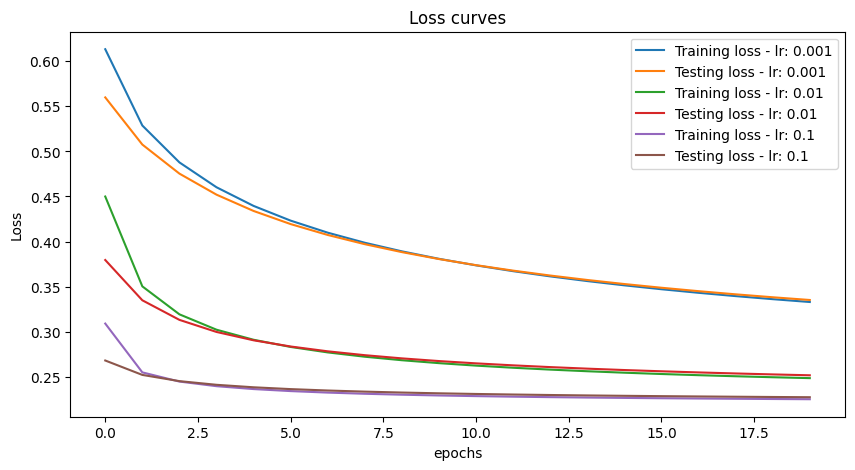

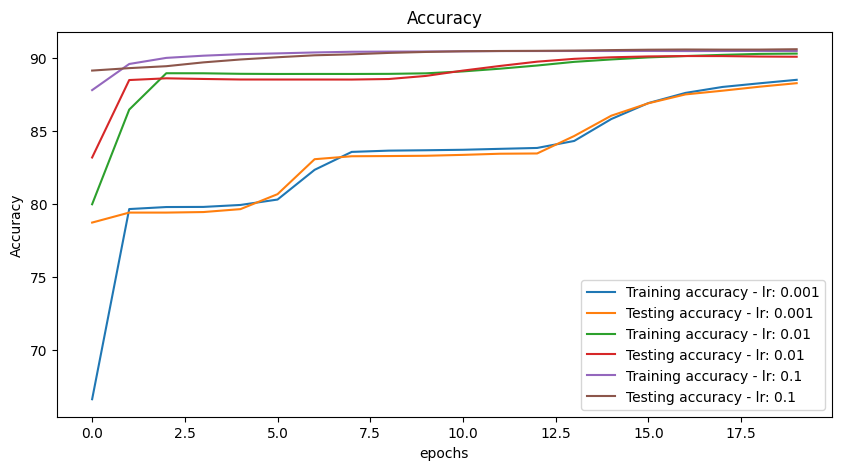

In [35]:

plt.figure(figsize=(10,5))
ax = plt.gca()
plt.plot(training_losses_lr1, label="Training loss - lr: "+str(lr1))
plt.plot(testing_losses_lr1, label="Testing loss - lr: "+str(lr1))
plt.plot(training_losses_lr2, label="Training loss - lr: "+str(lr2))
plt.plot(testing_losses_lr2, label="Testing loss - lr: "+str(lr2))
plt.plot(training_losses_lr3, label="Training loss - lr: "+str(lr3))
plt.plot(testing_losses_lr3, label="Testing loss - lr: "+str(lr3))
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Loss curves")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
ax = plt.gca()
plt.plot(training_accs_lr1, label="Training accuracy - lr: "+str(lr1))
plt.plot(testing_accs_lr1, label="Testing accuracy - lr: "+str(lr1))
plt.plot(training_accs_lr2, label="Training accuracy - lr: "+str(lr2))
plt.plot(testing_accs_lr2, label="Testing accuracy - lr: "+str(lr2))
plt.plot(training_accs_lr3, label="Training accuracy - lr: "+str(lr3))
plt.plot(testing_accs_lr3, label="Testing accuracy - lr: "+str(lr3))
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()

# F1 score

In [51]:
import numpy as np
from sklearn.metrics import f1_score


model_lr3.eval()

y_pred_training = model_lr3(X_training)
y_pred_training_class = torch.zeros(y_pred_training.shape)
y_pred_training_class[y_pred_training>=0.5] = 1

y_training_numpy = torch.squeeze(y_training).numpy()
y_pred_training_numpy = torch.squeeze(y_pred_training).detach().numpy()
f1_score_training = f1_score(y_training_numpy, y_pred_training_class, average=None)
print(f1_score_training)

y_pred_testing = model_lr3(X_testing)
y_pred_testing_class = torch.zeros(y_pred_testing.shape)
y_pred_testing_class[y_pred_testing>=0.5] = 1
y_testing_numpy = torch.squeeze(y_testing).numpy()
y_pred_testing_numpy = torch.squeeze(y_pred_testing).detach().numpy()
f1_score_testing = f1_score(y_testing_numpy, y_pred_testing_class, average=None)
print(f1_score_testing)


[0.86251658 0.92966702]
[0.86187247 0.92866602]
